### **Ph·∫ßn 1: Principal Component Analysis (PCA)**

### 1. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu 

In [20]:
import pandas as pd

# Load the CSV file to inspect the data structure
file_path = "data/delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv"
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order date                       26217 non-null  object 
 1   SUBSIDIARY_CD                    26217 non-null  object 
 2   GLOBAL_NO                        26217 non-null  object 
 3   CLASSIFY_CD                      26217 non-null  int64  
 4   CUST_CD                          26217 non-null  int64  
 5   BRAND_CD                         26217 non-null  object 
 6   INNER_CD                         26217 non-null  object 
 7   SUPPLIER_CD                      26217 non-null  object 
 8   Sales order line number          26217 non-null  int64  
 9   Stock class                      26217 non-null  int64  
 10  Consider count hodiday Saturday  26217 non-null  int64  
 11  SO QTY                           26217 non-null  int64  
 12  OTHER AREA SHIP DI

(   Order date SUBSIDIARY_CD       GLOBAL_NO  CLASSIFY_CD  CUST_CD BRAND_CD  \
 0  2022-08-25           MJP  08344472000137     21031103   344472     OSA1   
 1  2022-08-12           MJP  06000641365551      3712333      641     MSM1   
 2  2022-07-08           MJP  07032167936864     21045918    32167     SMC1   
 3  2022-07-08           MJP  01710046000973     21058302   710046     MIB1   
 4  2022-08-25           MJP  07107539916817     21050569   107539     NIQ1   
 
       INNER_CD SUPPLIER_CD  Sales order line number  Stock class  ...  \
 0  F7171260007        8121                        8            1  ...   
 1  30071630003        0263                        1            1  ...   
 2  F7499483132        9102                        1            1  ...   
 3  F4524160001        9163                        1            1  ...   
 4  F3017310155        9176                        6            1  ...   
 
    PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  SPECIAL_DIV  SO_DAY_OF_MONTH  \


In [21]:
# Drop columns with more than 50% missing values and non-numeric columns irrelevant for analysis
threshold = 0.5 * len(data)
columns_to_drop = [
    col for col in data.columns 
    if data[col].isnull().sum() > threshold or data[col].dtype == 'object'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Fill remaining missing values with the mean of the column
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

# Normalize numeric data for PCA and clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

# Check the resulting dataset shape and some statistics
data_cleaned.shape, data_cleaned.describe()


((26217, 23),
         CLASSIFY_CD        CUST_CD  Sales order line number   Stock class  \
 count  2.621700e+04   26217.000000             26217.000000  26217.000000   
 mean   8.198807e+06  260390.877293               268.876759      0.989167   
 std    7.766312e+06  245749.298949              4414.921961      0.103517   
 min    1.030101e+06      22.000000                 1.000000      0.000000   
 25%    3.738001e+06   62843.000000                 1.000000      1.000000   
 50%    3.954109e+06  147666.000000                 5.000000      1.000000   
 75%    1.220110e+07  500268.000000                26.000000      1.000000   
 max    2.400000e+07  999691.000000             90007.000000      1.000000   
 
        Consider count hodiday Saturday        SO QTY  ALLOCATION QTY  \
 count                     26217.000000  26217.000000    26217.000000   
 mean                          1.462181     13.371171       13.371171   
 std                           1.891055    107.750615      107.

### 2. X√¢y d·ª±ng v√† √°p d·ª•ng PCA

In [22]:
import numpy as np

def myPCA(A):
    cov_matrix = np.cov(A.T)  # Ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Gi√° tr·ªã ri√™ng v√† vector ri√™ng
    return eigenvectors, eigenvalues

In [23]:
eigenvectors, eigenvalues = myPCA(data_normalized)

In [24]:
# L·ª±a ch·ªçn s·ªë th√†nh ph·∫ßn ch√≠nh
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# S·ªë l∆∞·ª£ng th√†nh ph·∫ßn ch√≠nh ƒë·ªÉ ƒë·∫°t 95% ph∆∞∆°ng sai
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

17

In [25]:
print(f'Ph·∫ßn trƒÉm ph∆∞∆°ng sai c·ªßa t·ª´ng th√†nh ph·∫ßn ch√≠nh: {explained_variance_ratio}')

Ph·∫ßn trƒÉm ph∆∞∆°ng sai c·ªßa t·ª´ng th√†nh ph·∫ßn ch√≠nh: [ 1.57624141e-01  1.11287195e-01  9.80190302e-02  7.88486662e-02
  7.34006499e-03  1.71211849e-02  2.87015885e-02  5.60678289e-02
  5.32148901e-02  4.97945361e-02  4.82021995e-02  4.71995117e-02
  4.53456668e-02  4.33324288e-02  3.77676928e-02  3.89376400e-02
  4.01051818e-02  4.10905527e-02  2.49708366e-10 -4.83478428e-17
  8.31173197e-18 -3.60800499e-19  0.00000000e+00]


K·∫øt qu·∫£ cho th·∫•y: Th√†nh ph·∫ßn ƒë·∫ßu ti√™n ƒë√≥ng g√≥p 15.76%, th√†nh ph·∫ßn th·ª© hai 11.13%, v√† gi·∫£m d·∫ßn ·ªü c√°c th√†nh ph·∫ßn ti·∫øp theo.

In [26]:
print(f'T·ªïng ph∆∞∆°ng sai t√≠ch l≈©y: {cumulative_variance}')

T·ªïng ph∆∞∆°ng sai t√≠ch l≈©y: [0.15762414 0.26891134 0.36693037 0.44577903 0.4531191  0.47024028
 0.49894187 0.5550097  0.60822459 0.65801913 0.70622133 0.75342084
 0.7987665  0.84209893 0.87986663 0.91880427 0.95890945 1.
 1.         1.         1.         1.         1.        ]


T·ªïng ph∆∞∆°ng sai t√≠ch l≈©y: V·ªõi 2 th√†nh ph·∫ßn ƒë·∫ßu ti√™n: 26.89% t·ªïng ph∆∞∆°ng sai ƒë∆∞·ª£c gi·∫£i th√≠ch.

ƒê·ªÉ ƒë·∫°t 95% t·ªïng ph∆∞∆°ng sai, c·∫ßn s·ª≠ d·ª•ng 16 th√†nh ph·∫ßn ch√≠nh.

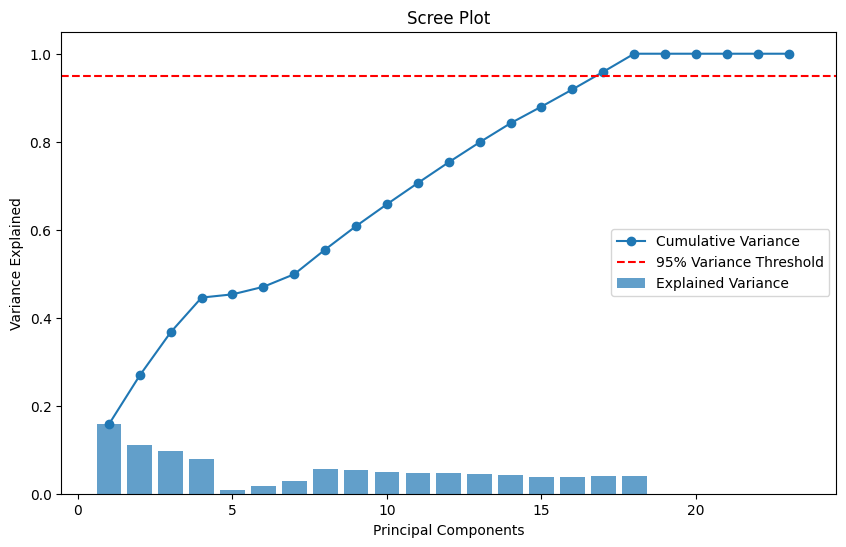

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.show()

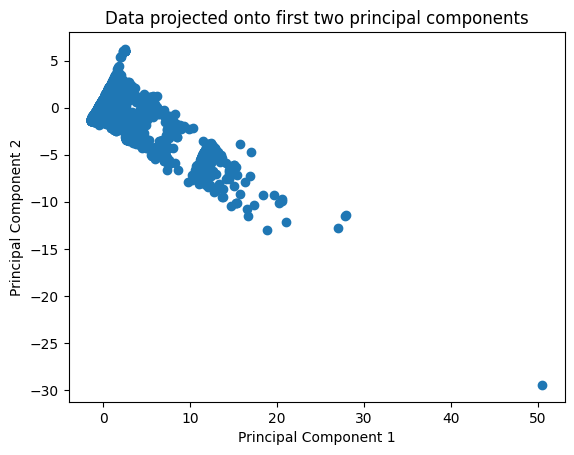

In [15]:
# V·∫Ω d·ªØ li·ªáu theo hai th√†nh ph·∫ßn ch√≠nh ƒë·∫ßu ti√™n
import matplotlib.pyplot as plt

reduced_data = data_normalized @ eigenvectors[:, :2]  # Gi·∫£m xu·ªëng 2 chi·ªÅu
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data projected onto first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Tr·∫£ l·ªùi c√¢u h·ªèi l√Ω thuy·∫øt**

- T·∫°i sao PCA l√† m·ªôt ph∆∞∆°ng ph√°p h·ªØu √≠ch trong gi·∫£m chi·ªÅu d·ªØ li·ªáu?

PCA gi·∫£m chi·ªÅu d·ªØ li·ªáu b·∫±ng c√°ch lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i c√°c th√†nh ph·∫ßn ch√≠nh mang nhi·ªÅu th√¥ng tin nh·∫•t. ƒêi·ªÅu n√†y gi√∫p tƒÉng hi·ªáu qu·∫£ t√≠nh to√°n v√† gi·∫£m hi·ªán t∆∞·ª£ng qu√° kh·ªõp.

- L√†m th·∫ø n√†o ƒë·ªÉ quy·∫øt ƒë·ªãnh s·ªë l∆∞·ª£ng th√†nh ph·∫ßn ch√≠nh c·∫ßn s·ª≠ d·ª•ng?

S·ª≠ d·ª•ng ph∆∞∆°ng sai t√≠ch l≈©y: Ch·ªçn s·ªë th√†nh ph·∫ßn sao cho t·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch ƒë·∫°t √≠t nh·∫•t 95% ho·∫∑c d·ª±a v√†o Scree plot (ƒë·ªì th·ªã ph∆∞∆°ng sai).

- So s√°nh PCA v·ªõi k·ªπ thu·∫≠t gi·∫£m chi·ªÅu kh√°c?

PCA: Tuy·∫øn t√≠nh, gi·ªØ l·∫°i th√†nh ph·∫ßn ch√≠nh d·ª±a tr√™n ph∆∞∆°ng sai.
t-SNE: Phi tuy·∫øn t√≠nh, t·ªët h∆°n cho tr·ª±c quan h√≥a d·ªØ li·ªáu kh√¥ng tuy·∫øn t√≠nh.
Autoencoder: H·ªçc ƒë·∫∑c tr∆∞ng phi tuy·∫øn, s·ª≠ d·ª•ng m·∫°ng n∆°-ron.

### **Ph·∫ßn 2: Ph√¢n c·ª•m d·ªØ li·ªáu (Clustering)**

### 1. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu: T∆∞∆°ng t·ª± nh∆∞ tr√™n

### 2. √Åp d·ª•ng K-Mean Clustering

In [40]:
import numpy as np

def myKmeans(A, num_clusters, max_iter=100):
    np.random.seed(42)
    centroids = A[np.random.choice(A.shape[0], num_clusters, replace=False)]
    for _ in range(max_iter):
        # G√°n c·ª•m
        distances = np.linalg.norm(A[:, None] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        # T√≠nh to√°n trung t√¢m c·ª•m m·ªõi
        new_centroids = np.array([A[clusters == k].mean(axis=0) for k in range(num_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

from sklearn.cluster import KMeans

# √Åp d·ª•ng K-means v·ªõi s·ªë c·ª•m = 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# In nh√£n c·ª•m v√† t·ªça ƒë·ªô trung t√¢m
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

print("Cluster Labels (K=2):", labels[:10])  # Hi·ªÉn th·ªã 10 nh√£n ƒë·∫ßu ti√™n
print("Centroids (K=2):\n", centroids)

Cluster Labels (K=2): [0 1 0 0 0 0 0 0 0 0]
Centroids (K=2):
 [[ 1.40449526  0.0839099   0.12202515 -0.26189375  1.13715275  0.12100313
   0.12100313  0.17135234 -0.26189375  0.38725058  0.03502347  0.17135099
  -0.65367771  0.         -0.18938725  0.11309774  0.06894799  1.36865747
   0.38725058  0.0629397   0.10790304  0.03092789 -0.00607114]
 [-0.56121327 -0.03352902 -0.04875925  0.10464845 -0.45438759 -0.04835087
  -0.04835087 -0.06846959  0.10464845 -0.15473898 -0.01399481 -0.06846904
   0.26119889  0.          0.07567604 -0.045192   -0.02755049 -0.54689308
  -0.15473898 -0.02514967 -0.04311629 -0.01235828  0.00242593]]


- Trung t√¢m c·ªßa c·ª•m 0 c√≥ gi√° tr·ªã cao h∆°n ·ªü nhi·ªÅu ƒë·∫∑c tr∆∞ng, ch·∫≥ng h·∫°n nh∆∞ CLASSIFY_CD (1.40449526) v√† SUPPLIER_DIV (1.36865747), cho th·∫•y ƒë√¢y l√† c·ª•m c√≥ c√°c gi√° tr·ªã cao h∆°n trung b√¨nh ·ªü c√°c ƒë·∫∑c tr∆∞ng li√™n quan.
- Ng∆∞·ª£c l·∫°i, c·ª•m 1 c√≥ c√°c gi√° tr·ªã th·∫•p h∆°n trung b√¨nh ·ªü h·∫ßu h·∫øt c√°c ƒë·∫∑c tr∆∞ng.

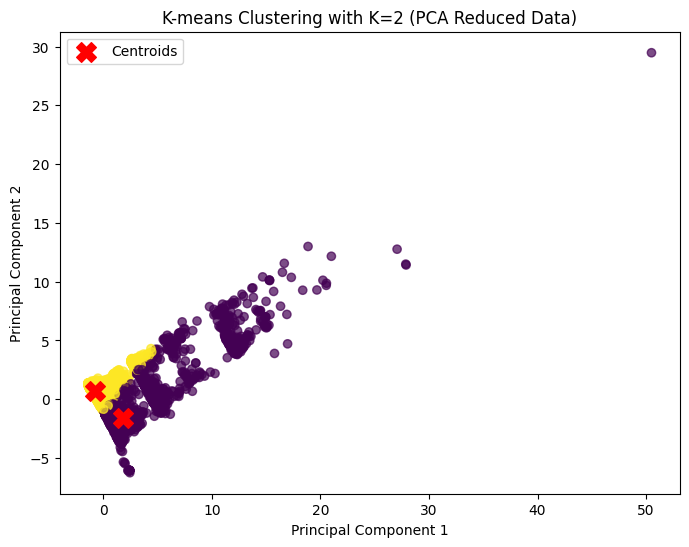

In [44]:
from sklearn.decomposition import PCA

# Gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng 2D v·ªõi PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# √Åp d·ª•ng K-means v·ªõi s·ªë c·ª•m = 2 tr√™n d·ªØ li·ªáu PCA
labels, centroids = myKmeans(pca_result, 2)

# Tr·ª±c quan h√≥a c·ª•m
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with K=2 (PCA Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
# T√≠nh to√°n ch·ªâ s·ªë Silhouette
silhouette = silhouette_score(data_normalized, labels)
print(f"Silhouette Score (K=2): {silhouette:.2f}")

Silhouette Score (K=2): 0.26


V·ªõi $ùêæ$ = 2, ch·ªâ s·ªë n√†y l√† 0.26, m·ªôt gi√° tr·ªã kh√° th·∫•p. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng c√°c c·ª•m kh√¥ng ƒë∆∞·ª£c ph√¢n bi·ªát r√µ r√†ng v√† c√≥ th·ªÉ c√≥ s·ª± ch·ªìng ch√©o gi·ªØa hai c·ª•m.

In [47]:
# Th√™m nh√£n c·ª•m v√†o d·ªØ li·ªáu
data_with_labels = pd.DataFrame(data_normalized, columns=data_cleaned.columns)
data_with_labels['Cluster'] = labels

# T√≠nh to√°n c√°c ƒë·∫∑c ƒëi·ªÉm trung b√¨nh c·ªßa t·ª´ng c·ª•m
cluster_analysis = data_with_labels.groupby('Cluster').mean()
print("Cluster Analysis:\n", cluster_analysis)

Cluster Analysis:
          CLASSIFY_CD   CUST_CD  Sales order line number  Stock class  \
Cluster                                                                
0           1.359435  0.078369                 0.118818    -0.253333   
1          -0.561565 -0.032373                -0.049082     0.104648   

         Consider count hodiday Saturday    SO QTY  ALLOCATION QTY  \
Cluster                                                              
0                               1.120962  0.119192        0.119192   
1                              -0.463055 -0.049237       -0.049237   

         SUPPLIER INV AMOUNT  PRODUCT ATTRIBUTION  SPECIAL DIV  ...  label  \
Cluster                                                         ...          
0                   0.186564            -0.253333     0.374472  ...    0.0   
1                  -0.077067             0.104648    -0.154689  ...    0.0   

         SHIP DECISION NO  PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  \
Cluster                    

Thu·ªôc t√≠nh ƒë√°ng ch√∫ √Ω:
- SUPPLIER_DIV: C·ª•m 0 c√≥ gi√° tr·ªã r·∫•t cao (1.351), trong khi c·ª•m 1 th·∫•p (-0.558). ƒêi·ªÅu n√†y cho th·∫•y c·ª•m 0 t·∫≠p trung v√†o c√°c nh√† cung c·∫•p v·ªõi c√°c ƒë·∫∑c ƒëi·ªÉm kh√°c bi·ªát h∆°n.
- SPECIAL_DIV: T∆∞∆°ng t·ª±, c·ª•m 0 c√≥ gi√° tr·ªã cao h∆°n (0.374) so v·ªõi c·ª•m 1 (-0.154), c√≥ th·ªÉ ƒë·∫°i di·ªán cho m·ªôt nh√≥m s·∫£n ph·∫©m ho·∫∑c ƒë∆°n h√†ng ƒë·∫∑c bi·ªát.

d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

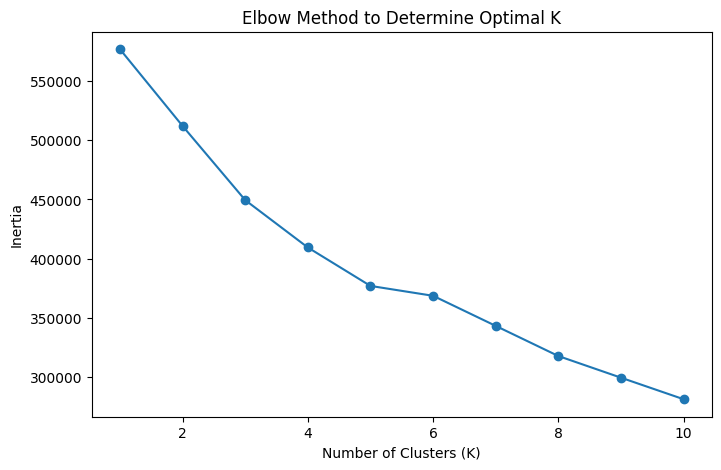

In [51]:
# Ph∆∞∆°ng ph√°p Elbow ƒë·ªÉ ch·ªçn s·ªë c·ª•m
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# V·∫Ω ƒë·ªì th·ªã Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

**Tr·∫£ l·ªùi c√¢u h·ªèi l√Ω thuy·∫øt**

- T·∫°i sao c·∫ßn chu·∫©n h√≥a d·ªØ li·ªáu tr∆∞·ªõc khi ph√¢n c·ª•m?

Chu·∫©n h√≥a ƒë·∫£m b·∫£o c√°c bi·∫øn c√≥ tr·ªçng s·ªë ngang nhau, tr√°nh vi·ªác bi·∫øn c√≥ ƒë∆°n v·ªã l·ªõn h∆°n ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ ph√¢n c·ª•m.

- So s√°nh k·∫øt qu·∫£ c·ªßa K-means v√† Hierarchical clustering?

K-means: Hi·ªáu qu·∫£ v·ªõi d·ªØ li·ªáu l·ªõn, y√™u c·∫ßu bi·∫øt tr∆∞·ªõc s·ªë c·ª•m.

Hierarchical: Kh√¥ng c·∫ßn bi·∫øt s·ªë c·ª•m tr∆∞·ªõc, tr·ª±c quan h∆°n nh∆∞ng k√©m hi·ªáu qu·∫£ tr√™n t·∫≠p d·ªØ li·ªáu l·ªõn.

- ·∫¢nh h∆∞·ªüng c·ªßa s·ªë l∆∞·ª£ng c·ª•m ƒë·∫øn k·∫øt qu·∫£?

S·ªë c·ª•m kh√¥ng ph√π h·ª£p c√≥ th·ªÉ d·∫´n ƒë·∫øn ph√¢n c·ª•m kh√¥ng ch√≠nh x√°c, l√†m gi·∫£m hi·ªáu qu·∫£ ph√¢n t√≠ch.

- So s√°nh K-means v·ªõi thu·∫≠t to√°n kh√°c (VD: DBSCAN)?

K-means: T·ªët cho c·ª•m h√¨nh c·∫ßu, nh·∫°y c·∫£m v·ªõi gi√° tr·ªã ngo·∫°i lai.
DBSCAN: X·ª≠ l√Ω t·ªët d·ªØ li·ªáu kh√¥ng ƒë·ªÅu v√† ngo·∫°i lai, kh√¥ng c·∫ßn s·ªë c·ª•m tr∆∞·ªõc, nh∆∞ng k√©m v·ªõi c·ª•m h√¨nh c·∫ßu ho·∫∑c m·∫≠t ƒë·ªô thay ƒë·ªïi.

### T√†i li·ªáu tham kh·∫£o
- https://mlcourse.ai/book/topic07/topic7_pca_clustering.html#introduction
- https://pca4ds.github.io/analysis-of-distances.html
- https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html
- https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp